## Test a new DataGenerator for Keras fit method based on a list of files

In [ ]:
#Need to install Keras
https://github.com/tensorflow/models/issues/4668
conda install python=3.6
pip install tensorflow
pip install keras

In [1]:
import sys
sys.path.insert(0, '../') #to load DataGenerator

In [2]:
from DataGenerator import ImgListDataGen
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator #In order to compare the new class
import time

Using TensorFlow backend.


In [2]:
DB_ruta= '/Users/dfreire/Dropbox/Datasets/small_dataset/prueba'

In [30]:
def execTime(generator):
    i=0
    start_time = time.time()
    for image_batch, labels_batch in generator:
        i+=1
        if i%iterations==0:
            break
    print("--- %s seconds ---" % (time.time() - start_time))

### Keras ImageDataGenerator

In [3]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
datagene = datagen.flow_from_directory(
    DB_ruta,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 1 classes.


In [4]:
len_datos = 1000
batch_size = 20
iterations = int(np.floor(len_datos / batch_size))
print('Iterations: {}'.format(iterations))

Iterations: 50


In [32]:
execTime(datagene)

--- 7.9242823123931885 seconds ---


### New ImgListDataGen

In [35]:
files = os.listdir(os.path.join(DB_ruta,'cats'))
print(len(files))

1000


In [36]:
filelist = [os.path.join(os.path.join(DB_ruta,'cats'), u) for u in files]

In [37]:
filelist[:5]

['/Users/dfreire/Dropbox/Datasets/small_dataset/prueba/cats/cat.0.jpg',
 '/Users/dfreire/Dropbox/Datasets/small_dataset/prueba/cats/cat.1.jpg',
 '/Users/dfreire/Dropbox/Datasets/small_dataset/prueba/cats/cat.10.jpg',
 '/Users/dfreire/Dropbox/Datasets/small_dataset/prueba/cats/cat.100.jpg',
 '/Users/dfreire/Dropbox/Datasets/small_dataset/prueba/cats/cat.101.jpg']

In [38]:
labels = np.zeros(len(filelist))
print(len(labels))

1000


In [39]:
len_datos = len(filelist)
batch_size = 20
iterations = int(np.floor(len_datos / batch_size))
print('Iterations: {}'.format(iterations))

Iterations: 50


#### Testing on the IAAPerspective augmentation mode

In [40]:
# Parameters
params = {
    'rescale': 1,
    'batch_size': batch_size,
    'n_classes': 1, #for testing purposes
    'aug_mode': 'IAAPerspective',
    'shuffle': True}
imggenerator = ImgListDataGen(img_files = filelist, labels=labels, **params)

In [41]:
execTime(imggenerator)

--- 7.354327201843262 seconds ---


#### Testing on the ShiftScaleRotate augmentation mode

In [42]:
# Parameters
params = {
    'rescale': 1,
    'batch_size': batch_size,
    'n_classes': 1, #for testing purposes
    'aug_mode': 'ShiftScaleRotate',
    'shuffle': True}
imggenerator = ImgListDataGen(img_files = filelist, labels=labels, **params)

In [43]:
execTime(imggenerator)

--- 5.445845127105713 seconds ---


#### Testing on the MediumAug augmentation mode

In [44]:
# Parameters
params = {
    'rescale': 1,
    'batch_size': batch_size,
    'n_classes': 1, #for testing purposes
    'aug_mode': 'MediumAug',
    'shuffle': True}
imggenerator = ImgListDataGen(img_files = filelist, labels=labels, **params)

In [45]:
execTime(imggenerator)

--- 17.8575918674469 seconds ---


#### Testing on the StrongAug augmentation mode

In [53]:
# Parameters
params = {
    'rescale': 1,
    'batch_size': batch_size,
    'n_classes': 1, #for testing purposes
    'aug_mode': 'StrongAug',
    'shuffle': True}
imggenerator = ImgListDataGen(img_files = filelist, labels=labels, **params)

In [49]:
execTime(imggenerator)

//anaconda/envs/SCI_env/lib/python3.6/site-packages/albumentations/augmentations/functional.py:271: RuntimeWarning: invalid value encountered in true_divide
  return cv2.filter2D(img, -1, kernel / np.sum(kernel))


--- 26.71966814994812 seconds ---


## Let's check some images

In [56]:
iterations=20
imgs = []
i=0
for img_batch, lab_batch in imggenerator:
    imgs.append(img_batch[0])   
    i+=1
    if i%iterations==0:
        break

//anaconda/envs/SCI_env/lib/python3.6/site-packages/albumentations/augmentations/functional.py:271: RuntimeWarning: invalid value encountered in true_divide
  return cv2.filter2D(img, -1, kernel / np.sum(kernel))


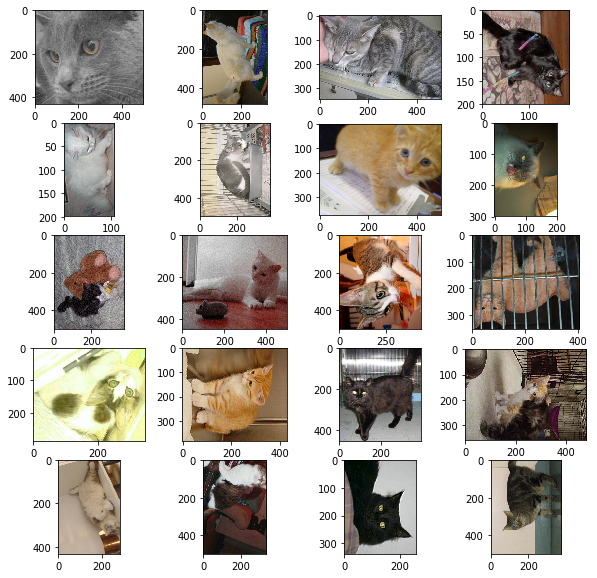

In [58]:
from matplotlib import pyplot as plt


w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = imgs[i-1].astype(np.int32)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()